<div class="alert alert-block alert-info">  

## <font color=darkblue>MSDS 593 EDA and Visualization: Homework #1</font>
###### By: Amanda Li Luo
###### Student ID #: 20645578


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina' 

<div class ="alert alert-block alert-success">

### Question 1: Create a 1D ndarray of numbers from 100 to 112 (step=1) inclusively and use python to


In [2]:
x = np.arange(100, 113, 1)
x

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112])

<div class ="alert alert-block alert-warning">
    
> **(a) Print the shape of the array**

In [3]:
print('Shape:', x.shape)

Shape: (13,)


<div class ="alert alert-block alert-warning">
    
> **(b) print the data type of the array**

In [4]:
print('Data type:', type(x))

Data type: <class 'numpy.ndarray'>


<div class ="alert alert-block alert-warning">

> **(c) Create a new array that is a slice of the original array with index [5 : 10] inclusively,and assign all values of the the new array to be 0.**

In [5]:
new_x = x[5:11]
print(new_x)
new_x[:] = 0
new_x

[105 106 107 108 109 110]


array([0, 0, 0, 0, 0, 0])

<div class ="alert alert-block alert-warning">
    
> **(d) Create a boolean vector from the array to indicate if any element is greater than 105,and less than or equal to 110.**

In [6]:
boolean_x = (x >105) & (x <= 110)

boolean_x

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False])

<div class ="alert alert-block alert-warning">

> **(e) Replace all the elements in the array that are greater than 105 and less than or equal to 110 with 0.**

In [7]:
x[boolean_x] = 0


In [8]:
x

array([100, 101, 102, 103, 104,   0,   0,   0,   0,   0,   0, 111, 112])

<div class="alert alert-block alert-success">  


### Question 2: Make a Series object with year values: 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000.

In [9]:
year = pd.Series(range(1991,2001,1))
year

0    1991
1    1992
2    1993
3    1994
4    1995
5    1996
6    1997
7    1998
8    1999
9    2000
dtype: int64

<div class ="alert alert-block alert-warning">

> **(a) Print out how many total values there are using code not manual counting**

In [10]:
print('Total number of years:', year.count())

Total number of years: 10


<div class ="alert alert-block alert-warning">

> **(b) Make another series with rainfall values 12.09, 12.35, 12.51, 10.25, 10.18, 10.59, 10.26, 10.48, 8.67, 10.23**

In [11]:
rainfall = pd.Series([12.09, 12.35, 12.51, 10.25, 10.18, 10.59, 10.26, 10.48, 8.67, 10.23])
rainfall

0    12.09
1    12.35
2    12.51
3    10.25
4    10.18
5    10.59
6    10.26
7    10.48
8     8.67
9    10.23
dtype: float64

<div class ="alert alert-block alert-warning">

> **(c) Imagine the order of rainfall values follow the order the years. Print out the years for which rainfall was less than 11.**

In [12]:
# a= rainfall[rainfall < 11].index
# print(a)
# year[a]
print(year[rainfall[rainfall < 11].index].values)

[1994 1995 1996 1997 1998 1999 2000]


<div class ="alert alert-block alert-warning">

> **(d) Normalize that rainfall series by x−mean std and print it out.**

In [13]:
rainfall.describe()

count    10.000000
mean     10.761000
std       1.200106
min       8.670000
25%      10.235000
50%      10.370000
75%      11.715000
max      12.510000
dtype: float64

In [14]:
df_mean = rainfall.describe()['mean']
df_std = rainfall.describe()['std']

df_mean, df_std

(10.761000000000001, 1.2001060138356296)

In [15]:
rainfall.index

RangeIndex(start=0, stop=10, step=1)

In [16]:
for num in range(0,10):
    rainfall.iloc[num] = (rainfall.iloc[num] - df_mean)/ df_std

print(rainfall)

0    1.107402
1    1.324050
2    1.457371
3   -0.425796
4   -0.484124
5   -0.142487
6   -0.417463
7   -0.234146
8   -1.742346
9   -0.442461
dtype: float64


<div class ="alert alert-block alert-warning">

> **(e) Set the year starting 1996 and forward as np.nan. Count the number of missing values.**

In [17]:
year[year >= 1996] = np.nan
missing_num = year.isna().value_counts()[False]
print('Number of missing values:', missing_num)

Number of missing values: 5


<div class ="alert alert-block alert-warning">

> **(f) Fill all the NaNs with 0.**

In [18]:
year[year.isna()] = 0
year

0    1991.0
1    1992.0
2    1993.0
3    1994.0
4    1995.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
dtype: float64

<div class="alert alert-block alert-success">  
    
### Question 3: For the cars.csv data set:


In [19]:
cars = pd.read_csv('cars.csv')
cars.head(10)

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
3,16.0,8,304.0,3433
4,17.0,8,302.0,3449
5,15.0,8,429.0,4341
6,14.0,8,454.0,4354
7,14.0,8,440.0,4312
8,14.0,8,455.0,4425
9,15.0,8,390.0,3850


<div class ="alert alert-block alert-warning">

> **(a) Use numpy’s function np.corrcoe f(x, y) to compute the correlation between a car’s weight and the miles per gallon; that function returns a matrix of x with x, x with y, etc... so the diagonal will always be correlation 1.0. What is the correlation between a car’s weight and the MPG? What does the correlation tell us about their relationship?**

>> The correlation between a car's weight and the miles per gallon is *-0.83224421*. This correlation is a strong negative correlation indicating that as a car's weight increases, the number of miles per gallon decreases(and vice versa). 

In [20]:
np.corrcoef(cars['MPG'], cars['WGT'])

array([[ 1.        , -0.83224421],
       [-0.83224421,  1.        ]])

<div class ="alert alert-block alert-warning">

> **(b) Display the records for all 8 cylinder cars**

In [21]:
cars[cars['CYL'] == 8]

,MPG,CYL,ENG,WGT
0,18.000000,8,307.0,3504
1,15.000000,8,350.0,3693
2,18.000000,8,318.0,3436
3,16.000000,8,304.0,3433
4,17.000000,8,302.0,3449
...,...,...,...,...
289,19.200001,8,267.0,3605
290,18.500000,8,360.0,3940
296,23.000000,8,350.0,3900
298,23.900000,8,260.0,3420


<div class ="alert alert-block alert-warning">

> **(c) Create a new column called ‘ENG2WGT‘ that has the engine to weight ratio**

In [22]:
cars['ENG2WGT'] = cars['ENG']/cars['WGT']

In [23]:
cars

,MPG,CYL,ENG,WGT,ENG2WGT
0,18.0,8,307.0,3504,0.087614
1,15.0,8,350.0,3693,0.094774
2,18.0,8,318.0,3436,0.092549
3,16.0,8,304.0,3433,0.088552
4,17.0,8,302.0,3449,0.087562
...,...,...,...,...,...
387,27.0,4,140.0,2790,0.050179
388,44.0,4,97.0,2130,0.045540
389,32.0,4,135.0,2295,0.058824
390,28.0,4,120.0,2625,0.045714


<div class="alert alert-block alert-success">  

### Question 4: For the kaggle − uber − other − f ederal.csv data set:

In [24]:
uber = pd.read_csv('kaggle-uber-other-federal.csv',
                  parse_dates = ['Date', 'Time'])
uber.head(2)

,Date,Time,PU_Address,DO_Address,Routing Details,PU_Address.1,Status
0,2014-07-01,2021-07-16 07:15:00,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;","1 Brookdale Plaza, BK NY;","PU: Brooklyn Museum, 200 Eastern Pkwy., BK NY;...","Brooklyn Museum, 200 Eastern Pkwy., BK NY; DO:...",Cancelled
1,2014-07-01,2021-07-16 07:30:00,"33 Robert Dr., Short Hills NJ;","John F Kennedy International Airport, vitona A...","PU: 33 Robert Dr., Short Hills NJ; DO: John F ...","33 Robert Dr., Short Hills NJ; DO: John F Kenn...",Arrived


<div class ="alert alert-block alert-warning">

> **(a) Create a new data frame containing ‘Time‘, ‘Status‘, and ‘PU_Address‘ columns**

In [25]:
new_uber = uber[['Time', 'Status', 'PU_Address']]
new_uber

,Time,Status,PU_Address
0,2021-07-16 07:15:00,Cancelled,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;"
1,2021-07-16 07:30:00,Arrived,"33 Robert Dr., Short Hills NJ;"
2,2021-07-16 08:00:00,Assigned,"60 Glenmore Ave., BK NY;"
3,2021-07-16 09:00:00,Assigned,"128 East 31 St., BK NY;"
4,2021-07-16 09:30:00,Assigned,"139-39 35 Ave., Flushing NY;"
...,...,...,...
94,2021-07-16 06:00:00,Assigned,"266 prospect park west, brooklyn NY;"
95,2021-07-16 08:30:00,Cancelled,"42 St., BK NY;"
96,2021-07-16 12:00:00,Arrived,"663 51st Street, BK NY;"
97,2021-07-16 16:45:00,Assigned,"255 Fieldston Terrace, Bronx NY;"


<div class ="alert alert-block alert-warning">

> **(b) Create a new column ‘Hour‘ extracting hour information from ‘Time‘. Hint: make sure ‘Time‘ is the correct data type and keep the date added.**

In [26]:
df_uber = new_uber.copy()
df_uber

,Time,Status,PU_Address
0,2021-07-16 07:15:00,Cancelled,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;"
1,2021-07-16 07:30:00,Arrived,"33 Robert Dr., Short Hills NJ;"
2,2021-07-16 08:00:00,Assigned,"60 Glenmore Ave., BK NY;"
3,2021-07-16 09:00:00,Assigned,"128 East 31 St., BK NY;"
4,2021-07-16 09:30:00,Assigned,"139-39 35 Ave., Flushing NY;"
...,...,...,...
94,2021-07-16 06:00:00,Assigned,"266 prospect park west, brooklyn NY;"
95,2021-07-16 08:30:00,Cancelled,"42 St., BK NY;"
96,2021-07-16 12:00:00,Arrived,"663 51st Street, BK NY;"
97,2021-07-16 16:45:00,Assigned,"255 Fieldston Terrace, Bronx NY;"


In [27]:
df_uber['Hour'] = df_uber['Time'].dt.hour
df_uber

,Time,Status,PU_Address,Hour
0,2021-07-16 07:15:00,Cancelled,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;",7
1,2021-07-16 07:30:00,Arrived,"33 Robert Dr., Short Hills NJ;",7
2,2021-07-16 08:00:00,Assigned,"60 Glenmore Ave., BK NY;",8
3,2021-07-16 09:00:00,Assigned,"128 East 31 St., BK NY;",9
4,2021-07-16 09:30:00,Assigned,"139-39 35 Ave., Flushing NY;",9
...,...,...,...,...
94,2021-07-16 06:00:00,Assigned,"266 prospect park west, brooklyn NY;",6
95,2021-07-16 08:30:00,Cancelled,"42 St., BK NY;",8
96,2021-07-16 12:00:00,Arrived,"663 51st Street, BK NY;",12
97,2021-07-16 16:45:00,Assigned,"255 Fieldston Terrace, Bronx NY;",16


<div class ="alert alert-block alert-warning">

> **(c) Set the index of the data frame to ‘Time‘.**

In [28]:
df_uber.set_index('Time', inplace = True)
df_uber

,Status,PU_Address,Hour
Time,,,
2021-07-16 07:15:00,Cancelled,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;",7
2021-07-16 07:30:00,Arrived,"33 Robert Dr., Short Hills NJ;",7
2021-07-16 08:00:00,Assigned,"60 Glenmore Ave., BK NY;",8
2021-07-16 09:00:00,Assigned,"128 East 31 St., BK NY;",9
2021-07-16 09:30:00,Assigned,"139-39 35 Ave., Flushing NY;",9
...,...,...,...
2021-07-16 06:00:00,Assigned,"266 prospect park west, brooklyn NY;",6
2021-07-16 08:30:00,Cancelled,"42 St., BK NY;",8
2021-07-16 12:00:00,Arrived,"663 51st Street, BK NY;",12


<div class ="alert alert-block alert-warning">

> **(d) Display records at positions between 10 and 15 inclusively**

In [29]:
df_uber.iloc[10:16]

,Status,PU_Address,Hour
Time,,,
2021-07-16 20:00:00,Assigned,"35-36 32 St., Astoria NY;",20
2021-07-16 03:30:00,Arrived,"862 East 21 Street, BK NY;",3
2021-07-16 14:00:00,Assigned,"1539 71st Street, BK NY;",14
2021-07-16 15:00:00,Arrived,"208 Elmwood ave, BK NY;",15
2021-07-16 20:45:00,Arrived,"543 1 St., BK NY;",20
2021-07-16 05:00:00,Arrived,513 Montgomery StreetBK NY;,5


<div class ="alert alert-block alert-warning">

> **(e) Display the ‘PU_Address‘ for records whose index is ’Today’s date 20:00:00’: hint: today’s date depends on the day you are working on the question.**

In [30]:
df_uber.index.hour == 7


array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [31]:
df_uber[(df_uber.index.hour == 20) & (df_uber.index.minute == 0)]

,Status,PU_Address,Hour
Time,,,
2021-07-16 20:00:00,Assigned,"35-36 32 St., Astoria NY;",20
2021-07-16 20:00:00,Arrived,"717 President Street, BK NY;",20


<div class ="alert alert-block alert-warning">

> **(f) Reset the data frame so that ‘Time‘ is a column again**

In [32]:
df_uber.reset_index('Time', inplace = True)

In [33]:
df_uber

,Time,Status,PU_Address,Hour
0,2021-07-16 07:15:00,Cancelled,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;",7
1,2021-07-16 07:30:00,Arrived,"33 Robert Dr., Short Hills NJ;",7
2,2021-07-16 08:00:00,Assigned,"60 Glenmore Ave., BK NY;",8
3,2021-07-16 09:00:00,Assigned,"128 East 31 St., BK NY;",9
4,2021-07-16 09:30:00,Assigned,"139-39 35 Ave., Flushing NY;",9
...,...,...,...,...
94,2021-07-16 06:00:00,Assigned,"266 prospect park west, brooklyn NY;",6
95,2021-07-16 08:30:00,Cancelled,"42 St., BK NY;",8
96,2021-07-16 12:00:00,Arrived,"663 51st Street, BK NY;",12
97,2021-07-16 16:45:00,Assigned,"255 Fieldston Terrace, Bronx NY;",16


<div class="alert alert-block alert-success">  

### Question 5: You work for a large school district as a data analyst. Your boss wants to purchase a large amount of cereal for school breakfasts. He needs to choose a manufacturer and product. He wants you to prepare a presentation for the executive team. You are provided with some data in cereal.csv:


<div class ="alert alert-block alert-warning">

> **(a) Initially explore the dataset by looking at the number of records, column names, column types and few record values. Through this initial look, combined with your boss’s goal above, list five analytics queries or questions that you would have about this dataset in your exploratory process.**


In [34]:
master_cereal = pd.read_csv('cereal.csv')
master_cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [35]:
master_cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


<div class ="alert alert-block alert-warning">

>> **Questions**
1. Which manufacturers produce the top five highest rating cereals?
2. Which manufacturer produces healthier cereal such that it is high in vitamins and low in sugar?
3. Which type of cereal has a higher rating in average?
4. What is the average cups in a serving for a typical cereal?
5. Would more cups in a serving be more popular?

<div class ="alert alert-block alert-warning">

> **(b) To answer the questions you have listed above, what columns from this data you would need? Print some basic statistical summaries and plots for at least 5 columns you would need to check missing values, extreme values and value distributions. List three findings you have at this point.**
>> In order to answer the questions I have listed above, I would need the columns *mfr*, *type*, *sugars*, *vitamins*, *cups*, and *rating* .
>> - mfr: Manufacturer of cereal:
    - A = American Home Food Products
    - G = General Mills
    - K = Kelloggs
    - N = Nabisco
    - P = Post
    - Q = Quaker Oats
    - R = Ralston Purina
>> - type: cold/hot
>> - sugars: grams of sugars
>> - vitamins:  vitamins and  minerals -  0,  25,  or  100,  indicating  the typical  percentage ofFDA recommended
>> - cups: number of cups in one serving
>> - rating: a rating of the cereals

In [36]:
master_cereal.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [37]:
df_cereal = master_cereal[['mfr','type', 'sugars', 'vitamins', 'cups', 'rating']]

In [38]:
df_cereal.head()

,mfr,type,sugars,vitamins,cups,rating
0,N,C,6,25,0.33,68.402973
1,Q,C,8,0,1.00,33.983679
2,K,C,5,25,0.33,59.425505
3,K,C,0,25,0.50,93.704912
4,R,C,8,25,0.75,34.384843


In [39]:
df_cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mfr       77 non-null     object 
 1   type      77 non-null     object 
 2   sugars    77 non-null     int64  
 3   vitamins  77 non-null     int64  
 4   cups      77 non-null     float64
 5   rating    77 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 3.7+ KB


In [40]:
df_cereal.describe()

,sugars,vitamins,cups,rating
count,77.000000,77.000000,77.000000,77.000000
mean,6.922078,28.246753,0.821039,42.665705
std,4.444885,22.342523,0.232716,14.047289
min,-1.000000,0.000000,0.250000,18.042851
25%,3.000000,25.000000,0.670000,33.174094
50%,7.000000,25.000000,0.750000,40.400208
75%,11.000000,25.000000,1.000000,50.828392
max,15.000000,100.000000,1.500000,93.704912


In [41]:
df_cereal['sugars'].value_counts().loc[-1]

1

In [42]:
df_cereal['sugars'].value_counts()

 3     13
 0      7
 12     7
 6      7
 10     5
 5      5
 8      5
 11     5
 9      4
 7      4
 13     4
 14     3
 2      3
 15     2
 4      1
 1      1
-1      1
Name: sugars, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe799e14d30>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe799e2d400>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe799e14940>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe799e2da90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe799e2ddd8>],
 'means': []}

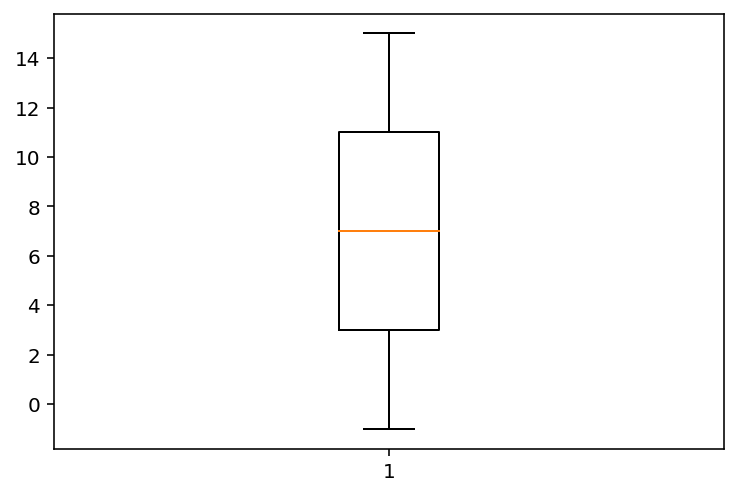

In [43]:
fig, ax = plt.subplots(figsize = (6,4))

ax.boxplot(df_cereal['sugars'])

<div class ="alert alert-block alert-warning">

>> **Observations**
 - In the *sugars* column, the minimum grams of sugar is -1 which is not logical as the least amount of sugar anything could contain is 0 gram. After delving more into this weird phenonme, I noticed there was only one element of -1 out of 77 elements. On the boxplot of df_cereal['sugars'], the one element of -1 didn't caused a big impact. It wasn't necessary to replace the element, however, it would be better to change it from -1 to 0 so the grams of sugars would make more logical sense. 
 - The *mfr* column is currently in object dtype, however, changing the *mfr* column from object type to category dtype would help more in the later data exploration portion.
 - The *type* column is also currently in object dtype, however, changeing the dtype of it from object to categorical dtype would make explorating the type of cereal more efficient.
 - The *mfr* column contains the abbreviation of the manfacturers' names. Thus, I would need to keep referring back to above statements for clarification on the abbreviation. In order to solve that, I would subsitute back the actual names for the abbreviated names. 

In [44]:
cereal = df_cereal.copy()

In [45]:
cereal[cereal['sugars']== -1].index

Int64Index([57], dtype='int64')

In [46]:
cereal['sugars'].iloc[57] = 0

/Users/amandaliluo/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [47]:
cereal.iloc[57]

mfr               Q
type              H
sugars            0
vitamins          0
cups           0.67
rating      50.8284
Name: 57, dtype: object

In [48]:
cereal['mfr'] = cereal['mfr'].astype('category')
cereal['type'] = cereal['type'].astype('category')

In [49]:
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   mfr       77 non-null     category
 1   type      77 non-null     category
 2   sugars    77 non-null     int64   
 3   vitamins  77 non-null     int64   
 4   cups      77 non-null     float64 
 5   rating    77 non-null     float64 
dtypes: category(2), float64(2), int64(2)
memory usage: 3.1 KB


In [50]:
cereal['type'].unique()

[C, H]
Categories (2, object): [C, H]

In [51]:
cereal['vitamins'].unique()

array([ 25,   0, 100])

In [52]:
cereal['mfr'].value_counts()

K    23
G    22
P     9
R     8
Q     8
N     6
A     1
Name: mfr, dtype: int64

In [53]:
#x = {'A': 'American Home Food Products', 
        #'G': 'General Mills', 'K': 'Kelloggs',
        ##Q': 'Quaker Oats', 'R': 'Ralston Purina'}
name = pd.DataFrame({'mfr': ['A', 'G', 'K', 'N', 'P', 'Q', 'R'],
                    'manfacturer': ['American Home Food Products', 'General Mills', 
                             'Kelloggs','Nabisco', 'Post', 'Quaker Oats', 'Ralston Purina']})

df = pd.merge(cereal, name, on = 'mfr')
df = df.drop('mfr', axis =1)
df = df[['manfacturer','type', 'sugars', 'vitamins','cups','rating']]
df['manfacturer'] = df['manfacturer'].astype('category')
df
        
        

,manfacturer,type,sugars,vitamins,cups,rating
0,Nabisco,C,6,25,0.33,68.402973
1,Nabisco,H,0,0,1.00,64.533816
2,Nabisco,C,0,0,1.00,68.235885
3,Nabisco,C,0,0,0.67,74.472949
4,Nabisco,C,0,0,0.67,72.801787
...,...,...,...,...,...,...
72,Post,C,3,25,0.25,53.371007
73,Post,C,4,25,0.33,45.811716
74,Post,C,11,25,1.33,28.742414
75,Post,C,14,25,0.67,37.840594


<div class ="alert alert-block alert-warning">

> **(c) To answer the questions you have listed above, describe 5 visualizations that can help you explore this data. (Example: line graph between variable x and y.).**

> **(d) Plot at three DIFFERENT graphs you have mentioned above. Summarise some findings from each plot. (For example, line chart of x and y and line chart of a and b doesn’t count as different; line chart and box plot does. )**

<div class ="alert alert-block alert-warning">

>> **1. Which manfactuers produces the top five highest rating cereals?**
    - Based on the histogram and the table below, Kelloggs produced the highest rating cereal of 93.70 and Nabisco produced the other 4 high rating cereals of 74.47, 72.80, 72.80, 68.40, and 68.24. Even though Kelloggs produced the highest rating cereal, however, Nabisco's productions composed majority of the top five highest rating cereals. 

In [54]:
x = df['rating'].sort_values(ascending = False).head(5).index
x

Int64Index([15, 3, 4, 0, 2], dtype='int64')

In [55]:
top5 = df.iloc[x]
top5

,manfacturer,type,sugars,vitamins,cups,rating
15,Kelloggs,C,0,25,0.50,93.704912
3,Nabisco,C,0,0,0.67,74.472949
4,Nabisco,C,0,0,0.67,72.801787
0,Nabisco,C,6,25,0.33,68.402973
2,Nabisco,C,0,0,1.00,68.235885


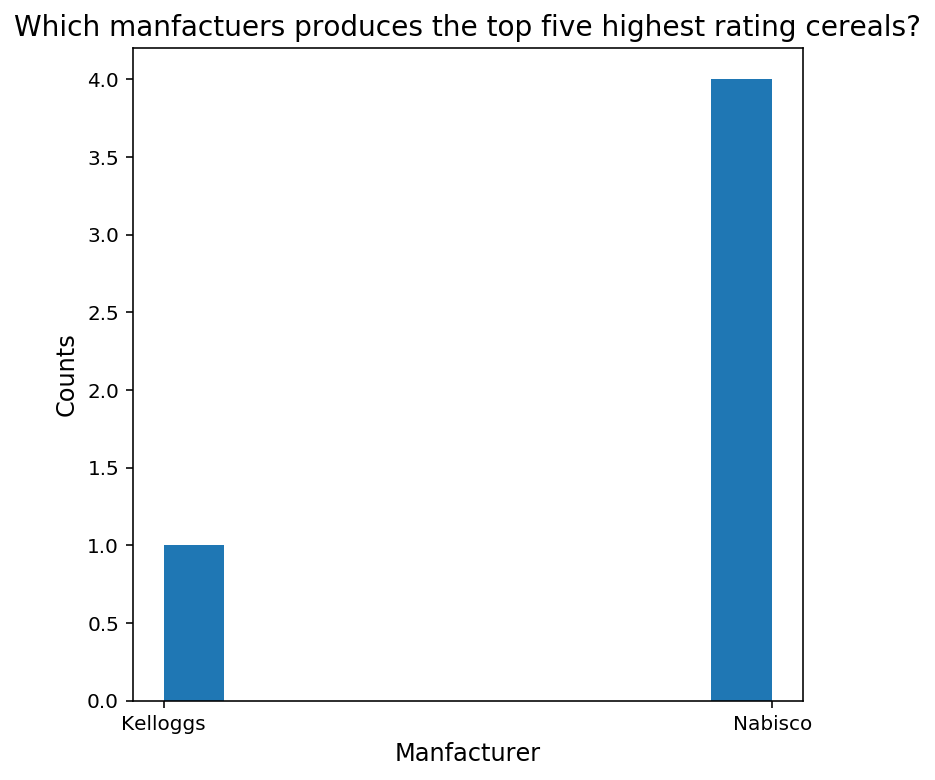

In [56]:
fig, ax = plt.subplots(figsize = (6,6))

ax.hist(top5.manfacturer)
ax.set_xlabel('Manfacturer', fontsize = 12)
ax.set_ylabel('Counts', fontsize = 12)
ax.set_title('Which manfactuers produces the top five highest rating cereals?', fontsize = 14)

plt.show()

<div class ="alert alert-block alert-warning">

>> **2. Which manufacturer produces healthier cereal that is high in vitamins and low in sugar?**
    - Based on the graph below and the table, American Home Food Products produces the healthiest cereal in average compared to other manfactureres. It has the highest ratio of vitamins to sugars of around 8.33. While Kellogg whom has the highest rating claimed the third place with a ratio of around 6.79.

In [57]:
df1 = df.copy()
df1['vitamins2sugars'] = df1['vitamins']/df1['sugars']
df1['vitamins2sugars'].unique()
# since nan means we have 0 in vitamin and 0 in grams of sugar, and inf means 0 in sugar
# I will replace nan and inf with zero

array([ 4.16666667,         nan,  5.        ,  0.        ,  2.08333333,
        2.27272727,         inf,  1.78571429, 12.5       ,  3.57142857,
        8.33333333,  1.92307692, 16.66666667, 11.11111111,  2.77777778,
       33.33333333,  1.66666667,  3.125     ,  2.5       , 25.        ,
        7.14285714,  6.25      ])

In [58]:
df1[df1['vitamins2sugars'].isnull()]

,manfacturer,type,sugars,vitamins,cups,rating,vitamins2sugars
1,Nabisco,H,0,0,1.00,64.533816,NaN
2,Nabisco,C,0,0,1.00,68.235885,NaN
3,Nabisco,C,0,0,0.67,74.472949,NaN
4,Nabisco,C,0,0,0.67,72.801787,NaN
10,Quaker Oats,C,0,0,1.00,60.756112,NaN
11,Quaker Oats,C,0,0,1.00,63.005645,NaN
13,Quaker Oats,H,0,0,0.67,50.828392,NaN


In [59]:
df1['vitamins2sugars'].sort_values(ascending = False)

15          inf
60    33.333333
31    33.333333
62    33.333333
47    25.000000
        ...    
3           NaN
4           NaN
10          NaN
11          NaN
13          NaN
Name: vitamins2sugars, Length: 77, dtype: float64

In [60]:
df1.iloc[15]

manfacturer        Kelloggs
type                      C
sugars                    0
vitamins                 25
cups                    0.5
rating              93.7049
vitamins2sugars         inf
Name: 15, dtype: object

In [61]:
df1 = df1.drop(index =15)
df1 = df1.dropna()


In [62]:
df1

,manfacturer,type,sugars,vitamins,cups,rating,vitamins2sugars
0,Nabisco,C,6,25,0.33,68.402973,4.166667
5,Nabisco,C,5,25,1.00,59.363993,5.000000
6,Quaker Oats,C,8,0,1.00,33.983679,0.000000
7,Quaker Oats,C,12,25,0.75,18.042851,2.083333
8,Quaker Oats,C,11,25,1.00,21.871292,2.272727
...,...,...,...,...,...,...,...
72,Post,C,3,25,0.25,53.371007,8.333333
73,Post,C,4,25,0.33,45.811716,6.250000
74,Post,C,11,25,1.33,28.742414,2.272727
75,Post,C,14,25,0.67,37.840594,1.785714


In [63]:
barh = df1.groupby('manfacturer').mean()
barh

,sugars,vitamins,cups,rating,vitamins2sugars
manfacturer,,,,,
American Home Food Products,3.000000,25.000000,1.000000,54.850917,8.333333
General Mills,7.954545,35.227273,0.875000,34.485852,7.476863
Kelloggs,7.909091,35.227273,0.809545,41.780896,6.799596
Nabisco,5.500000,25.000000,0.665000,63.883483,4.583333
Post,8.777778,25.000000,0.714444,41.705744,3.876864
Quaker Oats,8.600000,20.000000,0.784000,33.747554,2.537879
Ralston Purina,6.125000,25.000000,0.871250,41.542997,5.750473


In [64]:
barh.index

CategoricalIndex(['American Home Food Products', 'General Mills', 'Kelloggs',
                  'Nabisco', 'Post', 'Quaker Oats', 'Ralston Purina'],
                 categories=['American Home Food Products', 'General Mills', 'Kelloggs', 'Nabisco', 'Post', 'Quaker Oats', 'Ralston Purina'], ordered=False, name='manfacturer', dtype='category')

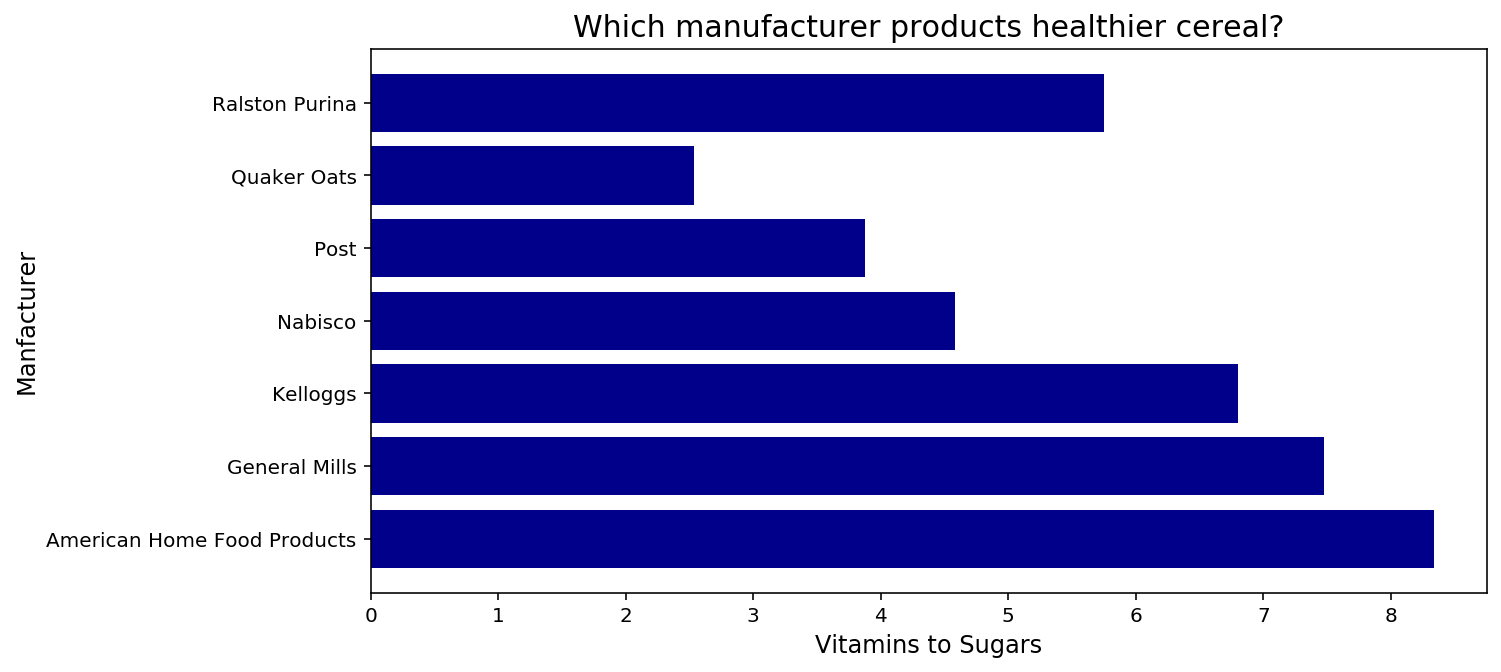

In [65]:
fig, ax = plt.subplots(figsize =(10,5))

x = barh.index
y = barh.vitamins2sugars

ax.barh(x, y, color= 'darkblue')
ax.set_ylabel('Manfacturer', fontsize = 12)
ax.set_xlabel('Vitamins to Sugars', fontsize = 12)
ax.set_title('Which manufacturer products healthier cereal?', fontsize = 15)

plt.show()

<div class ="alert alert-block alert-warning">

>> **3. Which type of cereal has a higher rating in average?**
    - Hot cereals have a higher rating of around 56.74 in average compared to cold cereals.

In [66]:
barh2 = df.groupby('type').mean()
barh2

,sugars,vitamins,cups,rating
type,,,,
C,7.175676,29.054054,0.818243,42.095218
H,1.000000,8.333333,0.890000,56.737708


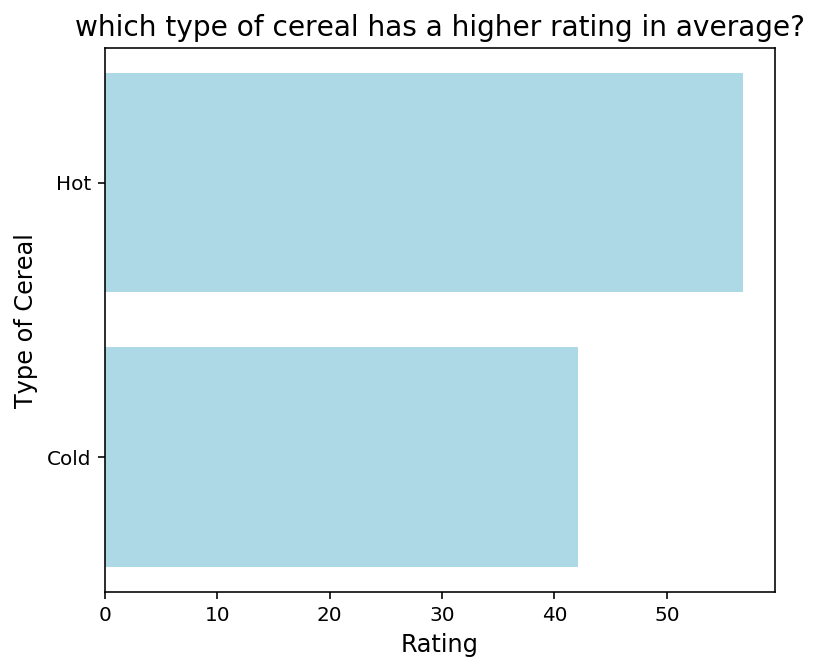

In [67]:
fig, ax = plt.subplots(figsize = (6,5))

x = barh2.index
y = barh2.rating

ax.barh(x, y, color = 'lightblue')
ax.set_xlabel('Rating', fontsize = 12)
ax.set_ylabel('Type of Cereal', fontsize = 12)
ax.set_title('which type of cereal has a higher rating in average?', fontsize = 14)
ax.set_yticklabels(['Cold', 'Hot'])

plt.show()


<div class ="alert alert-block alert-warning">

>> **4. What is the average cups in a serving for a typical cereal?**
    - The typical cereal have an average of around 0.82 cups of serving.


In [68]:
df['cups'].mean()

0.8210389610389613

>> 5. Would more cups in a serving be more popular?
    - From the scatterplot below, cereals that have more cups in a serving have lower ratings. However, the amount of cups in a serving and the rating of the cereal has a weak neagative correlation of around -0.20. Thus, the amount of cups in a serving have little effect on the rating of the cereal. 

In [69]:
f = df[['cups','rating']].corr()
f

,cups,rating
cups,1.00000,-0.20316
rating,-0.20316,1.00000


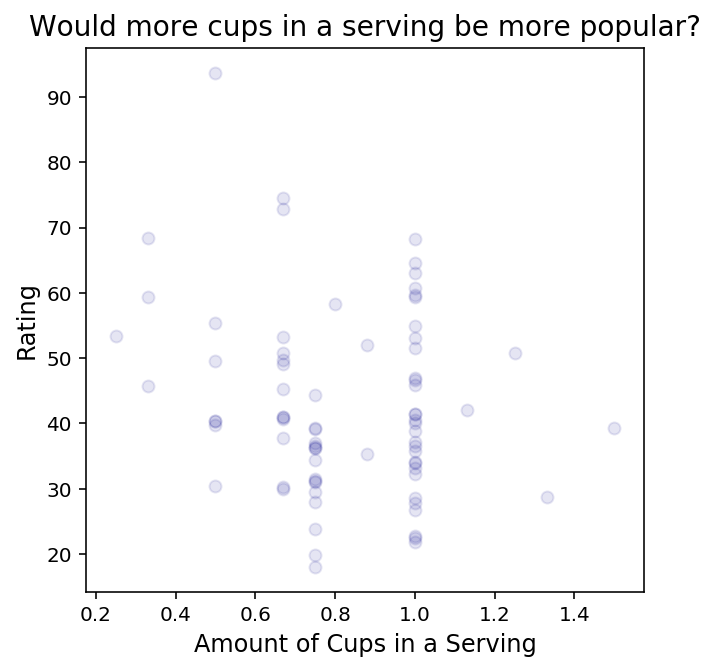

In [70]:
fig, ax = plt.subplots(figsize =(5,5))
x = df['cups']
y = df['rating']

ax.scatter(x, y, color = 'darkblue', alpha = 0.1)
ax.set_xlabel('Amount of Cups in a Serving', fontsize = 12)
ax.set_ylabel('Rating', fontsize = 12)
ax.set_title('Would more cups in a serving be more popular?', fontsize = 14)

plt.show()


<div class ="alert alert-block alert-warning">

> **(e) Besides the information provided in the data, what else information might be helpful to achieve your boss’ goal?**
- Aside from the information in the data set, some additional information that would help my boss pick a manufacturer and product for school breakfasts. One additional piece of information that would be helpful is if the cereal is being used for school breakfasts before. Another one is if the cereal has received complaints before in amounts.